# Pandas Warmup

Pandas out yer ears

Run the cell below w/o changes to load tests

In [1]:
#run without changes

from test_background import pkl_dump, test_obj_dict, run_test_dict, run_test

In [2]:
#__SOLUTION__

#run without changes

from test_background import pkl_dump, test_obj_dict, run_test_dict, run_test

## Data setup

Import: 

- Pandas under the alias 'pd'

- Matplotlib.pyplot under the alias 'plt'

Run:
- %matplotlib inline

In [4]:
#Your code here

In [4]:
#__SOLUTION__

#data manip
import pandas as pd

#data viz
import matplotlib.pyplot as plt

#jn commands
#run charts below cells
%matplotlib inline 

#### Make a dataframe by reading in the csv 'Chicago_Park_District__Movies_in_the_Parks_2019' which is in the "data" folder  

#### Assign the dataframe to the variable 'movies'

#### Look at the first five rows

In [6]:
#Your code here

In [7]:
#__SOLUTION__

movies = pd.read_csv('data/Chicago_Park_District__Movies_in_the_Parks_2019.csv')

movies.head()

,Day,Date,Park,Park Phone,Title,CC,Rating,Underwriter,Park Address,Location
0,Mon,08/12/2019,River Park,(312) 742-7516,Hotel Transylvania 3,Y,PG,NaN,5100 N. Francisco Ave.,"(41.97406838, -87.70144885)"
1,Thu,07/18/2019,Hoard Playground Park,(773) 256-1903,Black Panther,Y,PG-13,NaN,7201 S. Dobson Ave.,"(41.7640317, -87.59928813)"
2,Fri,06/07/2019,Berger Park Cultural Center,(773) 761-0376,Some Like It Hot,Y,NR,NaN,6205 N. Sheridan Rd.,"(41.99480562, -87.65538421)"
3,Sat,07/13/2019,Skinner Park,(312) 746-5560,Big Hero 6,Y,PG,The Museum of Science and Industry,1331 W. Monroe St.,"(41.88015941, -87.66077867)"
4,Wed,07/24/2019,Kilbourn Park,(773) 685-3351,El Reality,Y,NR,The International Latino Cultural Center,3501 N. Kilbourn Ave.,"(41.94450485, -87.73951111)"


#### What kind of type is the data in the Date column?  Turn it into a datetime type if it's not already

In [8]:
#Your code here

In [9]:
#__SOLUTION__

print(movies.dtypes)

movies.Date = pd.to_datetime(movies.Date)

Day             object
Date            object
Park            object
Park Phone      object
Title           object
CC              object
Rating          object
Underwriter     object
Park Address    object
Location        object
dtype: object


#### Replace the truncated days of the week in the Days column with the full string of the day of the week using the Date column

[*Hint*](https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.Series.dt.day_name.html)

In [10]:
#Your code here

In [11]:
#__SOLUTION__
movies['Day'] = movies['Date'].dt.day_name()

movies.head()

,Day,Date,Park,Park Phone,Title,CC,Rating,Underwriter,Park Address,Location
0,Monday,2019-08-12,River Park,(312) 742-7516,Hotel Transylvania 3,Y,PG,NaN,5100 N. Francisco Ave.,"(41.97406838, -87.70144885)"
1,Thursday,2019-07-18,Hoard Playground Park,(773) 256-1903,Black Panther,Y,PG-13,NaN,7201 S. Dobson Ave.,"(41.7640317, -87.59928813)"
2,Friday,2019-06-07,Berger Park Cultural Center,(773) 761-0376,Some Like It Hot,Y,NR,NaN,6205 N. Sheridan Rd.,"(41.99480562, -87.65538421)"
3,Saturday,2019-07-13,Skinner Park,(312) 746-5560,Big Hero 6,Y,PG,The Museum of Science and Industry,1331 W. Monroe St.,"(41.88015941, -87.66077867)"
4,Wednesday,2019-07-24,Kilbourn Park,(773) 685-3351,El Reality,Y,NR,The International Latino Cultural Center,3501 N. Kilbourn Ave.,"(41.94450485, -87.73951111)"


#### Sort `movies` by the Day column, with 'Monday' first and 'Sunday' last

In [12]:
#Your code here

In [13]:
#__SOLUTION__

# Turn Day column into an ordered categorical and sort
# this allows us to define a 'sort order'
movies.Day = pd.Categorical(
    movies.Day, 
    categories = [
        'Monday', 'Tuesday', 'Wednesday', 
        'Thursday', 'Friday', 'Saturday', 
        'Sunday'
    ],
    ordered=True
    )

movies.sort_values('Day', ascending=True, inplace=True)
movies.head()

,Day,Date,Park,Park Phone,Title,CC,Rating,Underwriter,Park Address,Location
0,Monday,2019-08-12,River Park,(312) 742-7516,Hotel Transylvania 3,Y,PG,NaN,5100 N. Francisco Ave.,"(41.97406838, -87.70144885)"
154,Monday,2019-06-17,Grant Park: Logan Monument,(312) 742-1134,Chicago,Y,PG-13,NaN,900 S. Michigan Ave.,"(41.87055847, -87.62428661)"
28,Monday,2019-08-19,Grant Park: Logan Monument,(312) 742-1134,Grease,Y,PG,The Greater South Loop Association,900 S. Michigan Ave.,"(41.87055847, -87.62428661)"
140,Monday,2019-09-09,South Shore Cultural Center,(773) 256-0149,Robin Hood,Y,PG-13,South Shore Cultural Center,7059 S. South Shore Drive,"(41.76660302, -87.56632372)"
128,Monday,2019-07-15,Harold Washington Playlot Park,(312) 747-6620,Isle of Dogs,Y,PG-13,NaN,5200 S. Hyde Park Blvd.,"(41.80047033, -87.58450476)"


## Data Exploration

#### What is the most frequent place to show a movie?  (Remember that there might be a tie!)

#### Assign your answer to the variable `venue_max` as a list of one or more strings

In [14]:
#Your code here

In [15]:
#__SOLUTION__
venue_counts = (
    movies
    .Park
    .value_counts()
)

max_spot = venue_counts.max()

venue_max = venue_counts[venue_counts==max_spot].index.tolist()

# #used for tests
# pkl_dump([(venue_max, 'venue_max')])
venue_max

['Ward (A. Montgomery) Park']

In [18]:
#test your answer here

run_test(venue_max, 'venue_max')

#### What's the area code in which movies are shown most frequently?

#### Assign your answer to the variable `area_code` as an integer

In [46]:
#Your code here

In [21]:
#__SOLUTION__
movies['area_code'] = [num[1:4] for num in movies['Park Phone']]

area_code = int(
    list(
        movies
        .area_code
        .value_counts()
        .index
    )
    [0]
)
# #used for tests
# pkl_dump([(area_code, 'area_code')])
area_code

312

In [23]:
#run this cell to test your answer

run_test(area_code, 'area_code')

#### Group the data by what day of the week the movies are shown using `.groupby()`

#### Assign to the variable `movies_grp_day` 
(concept check: what type of object is this?)

#### Using `movies_grp_day`, assign to `movies_per_day` a series where the index is the day of the week and the values are total counts of movies per day 

#### Again using `movies_grp_day`, assign to `unique_movies_per_day` a series where the index is the day of the week and the values are unique counts of movies per day of the week.

#### Use `movies_per_day` and `unique_movies_per_day` to calculate a series of how many repeat movies are shown per day of the week.  Assign this series to `repeats`

#### If needed, sort `repeats` so Monday is the first entry and Sunday is the last

In [49]:
#Your code here

In [24]:
#__SOLUTION__

movies_grp_day = movies.groupby('Day')

movies_per_day = movies_grp_day['Title'].count()

unique_movies_per_day = movies_grp_day['Title'].nunique()

repeats = movies_per_day - unique_movies_per_day
repeats

# #used for tests
# pkl_dump([(repeats, 'repeats')])

Day
Monday        3
Tuesday       9
Wednesday     6
Thursday     10
Friday       18
Saturday      9
Sunday        1
Name: Title, dtype: int64

In [26]:
#test your answer here

run_test(repeats, 'repeats')

#### Which day of the week has the fewest underwriters?  Run a calculation that results in a string (ie, don't run a calculation which displays the answer somewhere and then create a new string with the answer)

#### Assign that string to `day_underwriter_min`

In [52]:
#Your code here

In [27]:
#__SOLUTION__

day_underwriter_min = (
    movies
    .groupby(['Day'])
    ['Underwriter']
    .count()
    .idxmin()
)

# #used for tests
# pkl_dump([(day_underwriter_min, 'day_underwriter_min')])
day_underwriter_min

'Friday'

In [29]:
#test your answer here

run_test(day_underwriter_min, 'day_underwriter_min')

#### Using `movies_grp_day`, assign the variable `model_ratings_day` to a series where the index is the days of the week and the values are the modal rating for movies shown that day

#### Sort so that the first index is Monday and the last is Sunday


*Hint 1: look at [the groupby documentation](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) and write a function*

[*Hint 2*](https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.Categorical.html#pandas.Categorical)

In [ ]:
#Your code here

In [31]:
#__SOLUTION__


def groupby_mode(gm_group):
    '''
    Returns the modal value for a group in a groupby object
    
    Parameters:
        gm_group: group of a groupby object
    
    Returns:
        list of modal values in gm_group
    '''
    values = gm_group.value_counts()
        
    mode_list = list(
        values[
            values==values.max()
        ]
        .index
    )
    
    #what does this do? why only apply it when len==1?
    if len(mode_list)==1:
        mode_list = mode_list[0]
     
    return mode_list

modal_ratings_day = movies_grp_day['Rating'].agg(
    lambda x:
    groupby_mode(x)
)

modal_ratings_day.sort_index(ascending=True, inplace=True)

# #used for tests
# pkl_dump([(modal_ratings_day, 'modal_ratings_day')])

modal_ratings_day

Day
Monday          PG
Tuesday         PG
Wednesday       PG
Thursday     PG-13
Friday          PG
Saturday        PG
Sunday          PG
Name: Rating, dtype: object

In [33]:
#test your answer here
run_test(modal_ratings_day, 'modal_ratings_day')

## Strrretch Goal

#### Make a stacked bar chart showing the ratings of movies across days of the week using fig and ax objects

#### Title the x-axis "Day"

#### Title the y-axis "Count of Movies Shown"

#### Title the chart as a whole "Chicago Movies in the Park by Day and Rating"

[*Hint*](https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/bar_stacked.html)

When you're done it should look like this (w/ figsize 8,5):

![](viz/final_chart.png)

In [6]:
#Your code here

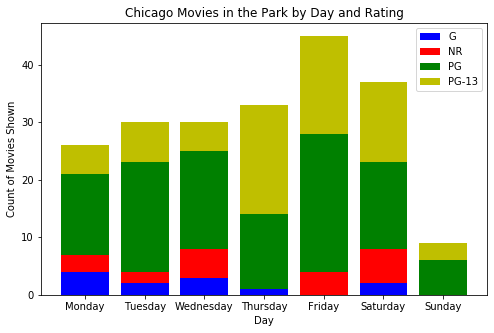

In [58]:
#__SOLUTION__

movies.sort_values('Day', ascending=True, inplace=True)

#create figures
fig, ax = plt.subplots(figsize=(8,5))
color_map = dict(zip(['NR', 'G', 'PG', 'PG-13'], ['r','b','g','y']))

#this will store info for the legend
reps = []

#for each day:
for index, day in enumerate(movies.Day.unique()):
    
    #get series with index rating and values play count
    counts = movies.groupby('Day').get_group(day)['Rating'].value_counts()
    
    #sort so ratings are in the same order each day
    counts = counts.sort_index(ascending=True)
    
    #track where to start each stacked bar 
    lower=0
    
    #for each rating per day
    for rating, count in counts.items():        
        
        #extract (rating, play count, day) and use to graph
        rep, = ax.bar(day, 
               count, 
               color=color_map[rating],
               bottom=lower       
        ) 
        
        #set bottom of next bar at top of graphed one
        lower=count+lower
        
        #append graph info for legend
        reps.append(rep)
        
#graph metadata
ax.legend(labels=['G', 'NR', 'PG', 'PG-13'])
ax.set_xlabel('Day')
ax.set_ylabel('Count of Movies Shown')
ax.set_title('Chicago Movies in the Park by Day and Rating')
plt.savefig('viz/final_chart.png')
plt.show()